In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_2018 = pd.read_csv('df_2018_total.csv')
data_2019 = pd.read_csv('df_2019_total.csv')
data_2020 = pd.read_csv('df_2020_total.csv')

/Users/yanghang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/yanghang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
violation_2018 = pd.DataFrame(data_2018['Violation Description'].value_counts())
violation_2018 = violation_2018.head(3)
violation_2018

violation_2019 = pd.DataFrame(data_2019['Violation Description'].value_counts())
violation_2019 = violation_2019.head(3)
violation_2019

violation_2020 = pd.DataFrame(data_2020['Violation Description'].value_counts())
violation_2020 = violation_2020.head(3)
violation_2020

,Violation Description
PHTO SCHOOL ZN SPEED VIOLATION,4397347
FAILURE TO STOP AT RED LIGHT,389420
BUS LANE VIOLATION,338606


In [7]:
data_2018['Violation Description'].value_counts()

PHTO SCHOOL ZN SPEED VIOLATION    1013212
FAILURE TO STOP AT RED LIGHT       486518
BUS LANE VIOLATION                 212465
38-Failure to Dsplay Meter Rec     127128
21-No Parking (street clean)       123264
                                   ...   
06-Nighttime PKG (Trailer)              2
79A-Bus Layover (W/ Pass)               1
96-Railroad Crossing                    1
12-No Stand (snow emergency)            1
04B-Downtown Bus Area, No Prmt          1
Name: Violation Description, Length: 92, dtype: int64

In [5]:
data_2019['Violation Description'].value_counts()

PHTO SCHOOL ZN SPEED VIOLATION    2350126
FAILURE TO STOP AT RED LIGHT       429868
BUS LANE VIOLATION                 248367
MOBILE BUS LANE VIOLATION            2219
Field Release Agreement               612
Name: Violation Description, dtype: int64

In [6]:
data_2020['Violation Description'].value_counts()

PHTO SCHOOL ZN SPEED VIOLATION    4397347
FAILURE TO STOP AT RED LIGHT       389420
BUS LANE VIOLATION                 338606
21-No Parking (street clean)       214599
38-Failure to Dsplay Meter Rec     180539
                                   ...   
28-O/T STD,DPL/Con,30 Mn,D Dec          1
08A-Engine Idling (School Zone          1
6                                       1
58-Marginal Street/Water Front          1
79A-Bus Layover (W/ Pass)               1
Name: Violation Description, Length: 97, dtype: int64

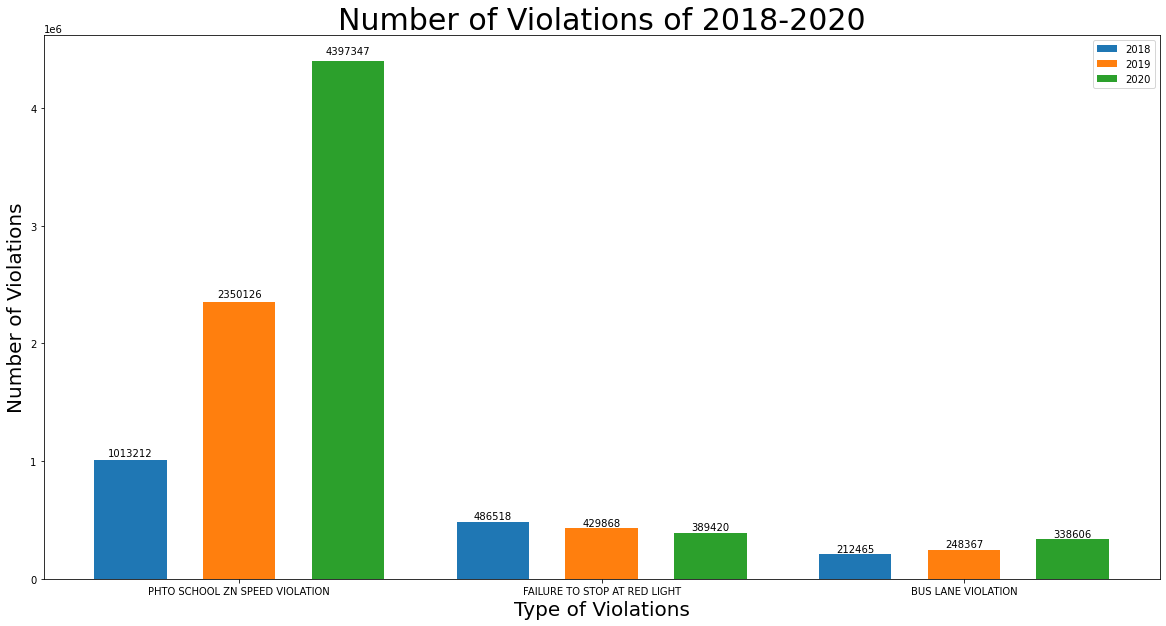

In [5]:

fig,ax = plt.subplots(figsize =(20, 10))

X = ['PHTO SCHOOL ZN SPEED VIOLATION','FAILURE TO STOP AT RED LIGHT','BUS LANE VIOLATION']

X_axis = np.arange(len(X))

  
a = plt.bar(X_axis - 0.3, list(violation_2018['Violation Description']), 0.2, label = '2018')
b = plt.bar(X_axis, list(violation_2019['Violation Description']), 0.2, label = '2019')
c = plt.bar(X_axis + 0.3, list(violation_2020['Violation Description']), 0.2, label = '2020')
  
plt.xticks(X_axis, X)

plt.xlabel("Type of Violations", fontdict = {'fontsize' : 20})
plt.ylabel("Number of Violations", fontdict = {'fontsize' : 20})
plt.title("Number of Violations of 2018-2020", fontdict = {'fontsize' : 30})

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(a)
autolabel(b)
autolabel(c)

plt.legend()
plt.show()

## Test

In [3]:
data_2020.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Year,Month,Day
0,5109306230,88009,NY,MED,2020-01-01,7,SUBN,JEEP,V,0,...,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN,2020,1,1
1,5109308240,LCH6921,PA,PAS,2020-01-01,7,SW,CHEVR,V,0,...,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN,2020,1,1
2,5600024162,EHM3610,NY,PAS,2020-01-02,12,SUBN,MAZDA,V,0,...,NaN,0,NaN,MOBILE BUS LANE VIOLATION,NaN,NaN,NaN,2020,1,2
3,5600024150,AB64604,CT,PAS,2020-01-02,12,PK,TOYOT,V,0,...,NaN,0,NaN,MOBILE BUS LANE VIOLATION,NaN,NaN,NaN,2020,1,2
4,5600024046,T713131C,NY,OMT,2020-01-02,12,4DSD,NISSA,V,0,...,NaN,0,NaN,MOBILE BUS LANE VIOLATION,NaN,NaN,NaN,2020,1,2


In [13]:
data_2020['Violation Description'].isna().sum().sum() #nah value in 2020

6395090

In [ ]:
data_2020['Violation Description'].dropna().sum()

In [15]:
len(data_2020['Violation Description'])

13081611

In [5]:
len(data_2020)

13081611

In [8]:
len(data_2020)

13081611